# 1. Logistic regression 
##### [using Fish prediction dataset]

Species    0
Weight     0
length1    0
length2    0
length3    0
Height     0
Width      0
dtype: int64

Accuracy: 0.8125


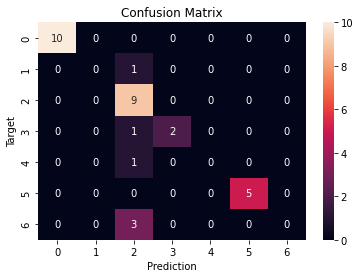

In [1]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as m

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\fish_prediction.csv")
print(da.isna().sum())

x=da.iloc[:,1:]
y=da.loc[:,'Species']

#Scaling
from sklearn.preprocessing import MinMaxScaler 
sca=MinMaxScaler()
sca.fit(x)
x_sca=sca.transform(x)

#Transformation of Y
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()
y=lb.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

from sklearn.metrics import accuracy_score
print("\nAccuracy:",accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
s.heatmap(cm,annot=True)
m.xlabel("Prediction"); m.ylabel('Target')
m.title('Confusion Matrix'); m.show()

                                                            

# 2. SVM Model
##### [Using Fish prediction dataset]

C:\Users\reddy\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


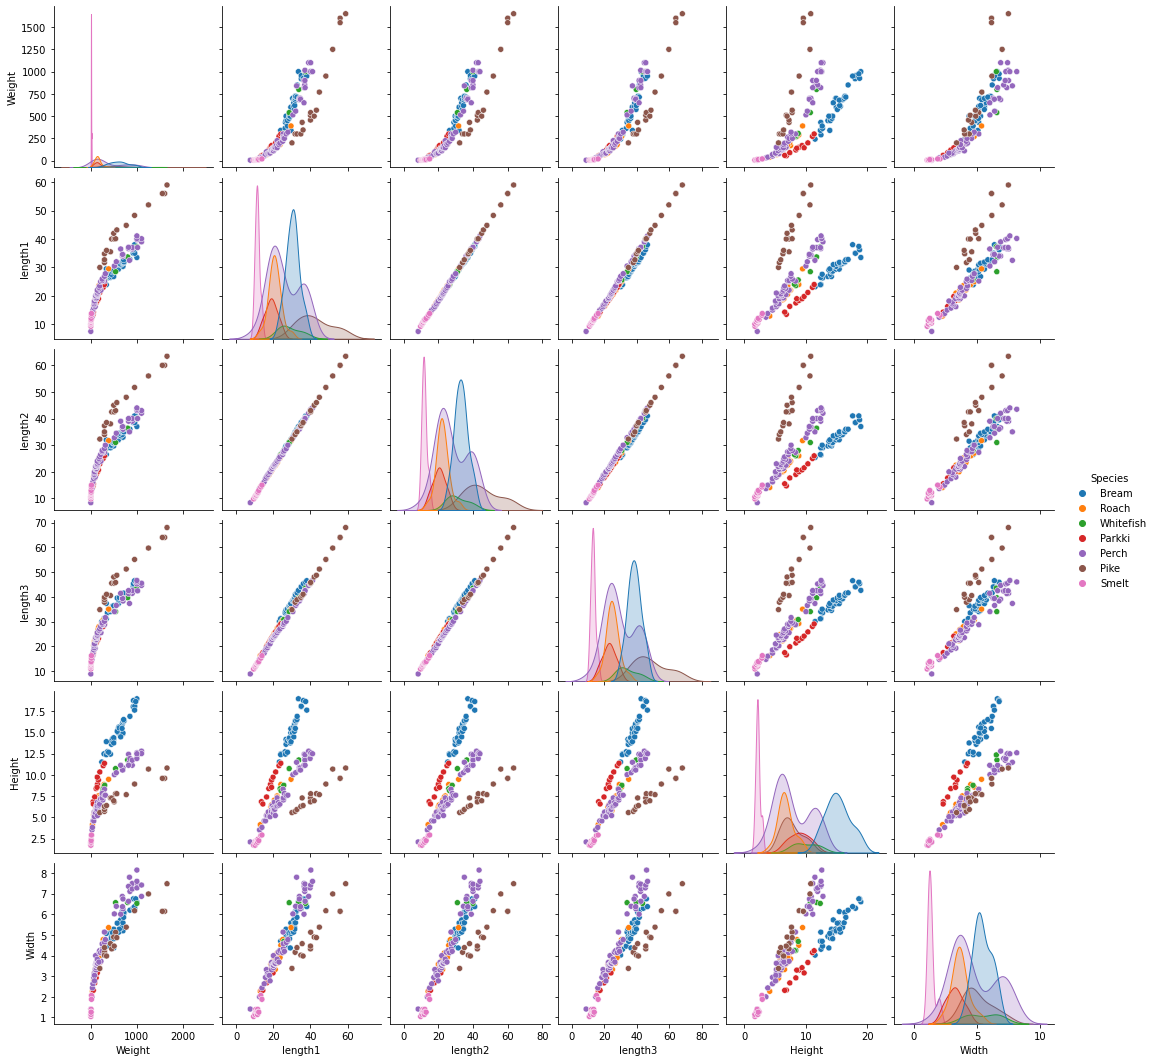


Accuracy: 37.5


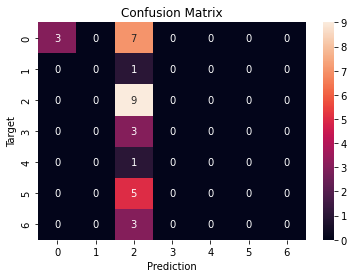

In [2]:
da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\fish_prediction.csv")
s.pairplot(data=da,hue='Species')
m.show()

x=da.iloc[:,1:]
y=da.loc[:,'Species']

#Transformation of Y
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()
y=lb.fit_transform(y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sca,y,test_size=0.2,random_state=42)

from sklearn.svm import SVC
mod=SVC(kernel='rbf',random_state=1,gamma='auto')
mod.fit(x_train,y_train)
y_pred=mod.predict(x_test)

from sklearn.metrics import accuracy_score
print("\nAccuracy:",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
s.heatmap(cm,annot=True)
m.xlabel("Prediction"); m.ylabel('Target')
m.title('Confusion Matrix'); m.show()

# 3. Random Forest Classifier model
##### [Using Breast Cancer dataset]


Accuracy of the model using Random Forest Regression alogorithm is 0.956140350877193


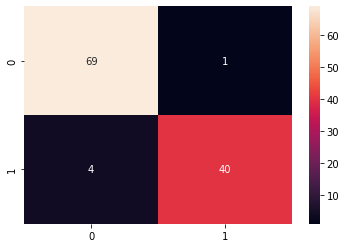

In [3]:
import pandas as p
import seaborn as s
import matplotlib.pyplot as m

da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\brca1.csv")
da.drop(['id'],axis=1,inplace=True)
da.diagnosis=[1 if i=='M' else 0 for i in da.diagnosis]

x=da.drop(['diagnosis'],axis=1)
y=da.diagnosis.values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

from sklearn.metrics import accuracy_score
print("\nAccuracy of the model using Random Forest Regression alogorithm is",accuracy_score(y_test,y_pred1))

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
s.heatmap(cm,annot=True)
m.show()

# [ *Optional* ] for every model u can add this predicting code.

### Below this one is for SVM model

In [4]:
we = float(input('Enter Weight: '))
l1 = float(input('Enter Length1: '))
l2 = float(input('Enter Length2: '))
l3 = float(input('Enter Length3: '))
h = float(input('Enter Height: '))
w = float(input('Enter Width: '))

inp=p.DataFrame([[we,l1,l2,l3,h,w]], columns=['Weight','length1','length2','length3','Height','Width'])
res=mod.predict(inp)
pred=lb.inverse_transform(res)
print("Predicted Specie:", pred[0])

Predicted Specie: Perch


C:\Users\reddy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


## 4. K-Means 
### [Using Mall Customers dataset]

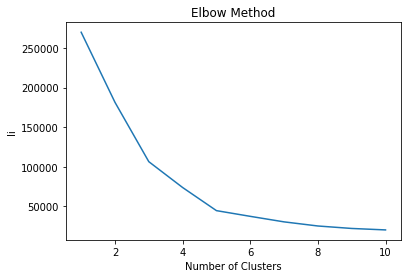

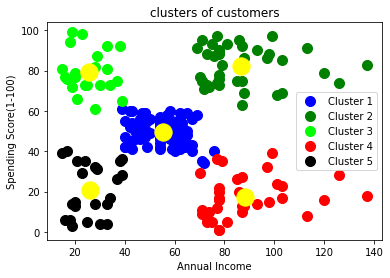

In [1]:
import pandas as p
import matplotlib.pyplot as m
da=p.read_csv("C:\\Users\\reddy\\Desktop\\Data\\Mall_Customers.csv")
x=da.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
li=[]

for i in range(1,11):
    mod=KMeans(n_clusters=i,init='k-means++', random_state=42,n_init=10)
    mod.fit(x)
    li.append(mod.inertia_)

m.plot(range(1,11), li)
m.title("Elbow Method")
m.xlabel('Number of Clusters'); m.ylabel('li'); m.show()

mod=KMeans(n_clusters=5,init='k-means++', random_state=42,n_init=10)
y_pred=mod.fit_predict(x)

m.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100, c='blue', label='Cluster 1')
m.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='g', label='Cluster 2') 
m.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100, c='lime', label='Cluster 3')
m.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100, c='red', label='Cluster 4') 
m.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100, c='k', label='Cluster 5')
m.scatter (mod.cluster_centers_[:,0],mod.cluster_centers_[:,1],s=300,c='yellow')
m.title("clusters of customers")
m.xlabel("Annual Income"); m.ylabel("Spending Score(1-100)")
m.legend();m.show()